# Cyclistic Bike-Share Analysis
<pre>
   <b>Company:</b>  Cyclistic
<b>Department:</b>  Marketing
   <b>Manager:</b>  Lily Moreno
   <b>Analyst:</b>  Malcomb C. Brown
      <b>Date:</b>  Dec. 06, 2022
</pre>
## Stakeholders
- Lily Moreno, Director of Marketing
- Marketing Analytics Team
- Executive Team

## Business Task
- Design a marketing strategy targeted at converting casual riders into annual members.<br>

## Objective
- identify how casual riders and annual members use Cyclistic differently

## Data Collection
- Collecting the last 12 months worth of Cyclistic trip data.
- Data was downloaded as zip files from [Divvy](https://divvy-tripdata.s3.amazonaws.com/index.html) under this [license](https://www.divvybikes.com/data-license-agreement).
- The data was made available by Motivate International Inc.
- Considered internal data for analysis purposes

## Preprocessing
- CSV files were extracted from the zip files
- Verified file and column structure in Notepad++
- Inspected data types with Excel

In [1]:
# Importing required libraries
import os                       # for interacting with the operating system
import pandas as pd             # for working with tabular data
import matplotlib.pyplot as plt # for basic plotting
import seaborn as sns           # for advanced statistical plotting
import calendar                 # for weekdays and months ordering lists

%matplotlib inline

# Set the style of the plots
plt.style.use("seaborn")

### Load csv files

In [2]:
# Get csv file path
dir_path = os.getcwd() + "\\Original_data_20221127\\"

# Get a list of all the trip data csv files
tripdata_files = os.listdir(dir_path)
tripdata_files

['202111-divvy-tripdata.csv',
 '202112-divvy-tripdata.csv',
 '202201-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv',
 '202203-divvy-tripdata.csv',
 '202204-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 '202208-divvy-tripdata.csv',
 '202209-divvy-publictripdata.csv',
 '202210-divvy-tripdata.csv']

In [3]:
# Merge all the csv files into one dataframe 
trip_data = pd.concat([pd.read_csv(dir_path + filename) for filename in tripdata_files])

### Inspect the merged dataset

In [4]:
# Dataframe metadata
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5755694 entries, 0 to 558684
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 614.8+ MB


In [5]:
# Summary statistics
trip_data.describe(include = "all")

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5755694,5755694,5755694,5755694,4877517,4877517,4815684,4815684,5.755694e+06,5.755694e+06,5.749859e+06,5.749859e+06,5755694
unique,5755694,3,4824622,4836310,1639,1306,1663,1314,NaN,NaN,NaN,NaN,2
top,7C00A93E10556E47,electric_bike,2022-05-30 13:05:15,2022-08-22 12:47:49,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,1,2935552,9,20,75631,75631,76002,76002,NaN,NaN,NaN,NaN,3402661
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190167e+01,-8.764782e+01,4.190192e+01,-8.764802e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.677934e-02,3.050527e-02,4.688818e-02,3.009472e-02,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188103e+01,-8.766201e+01,4.188103e+01,-8.766356e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.193000e+01,-8.762952e+01,4.193000e+01,-8.762954e+01,NaN


<b>There are no duplicates present in the dataset as the most frequent 'ride_id' appears only once.</b><br>
<b>'started_at' and 'ended_at' columns need to be converted to datetime objects.</b><br>
#### Dataset has null values for:
- 'start_station_name'
- 'start_station_id'
- 'end_station_name'
- 'end_station_id'
- 'end_lat'
- 'end_lng'

#### Questions
- Can we get the missing station data? How?
- Can we use the 'start_lat' and 'start_lng' to find the 'start_station_name' and 'start_station_id'?
- Is the data even needed for my analysis?

### Filter for Null values
These records to be stored in an error output file

### How many records are missing the Start Station Name?

In [6]:
# Filter for by 'start_station_name'
missing_start_station_name = trip_data[trip_data["start_station_name"].isnull()]
missing_start_station_name

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NaN,NaN,NaN,NaN,41.93,-87.72,41.960000,-87.730000,casual
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NaN,NaN,NaN,NaN,41.96,-87.70,41.920000,-87.700000,casual
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NaN,NaN,NaN,NaN,41.96,-87.70,41.960000,-87.700000,casual
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NaN,NaN,NaN,NaN,41.94,-87.79,41.930000,-87.790000,casual
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NaN,NaN,NaN,NaN,41.90,-87.63,41.880000,-87.620000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552767,0F591695DB0F499B,electric_bike,2022-10-20 18:37:21,2022-10-20 18:47:05,NaN,NaN,Sheridan Rd & Montrose Ave,TA1307000107,41.95,-87.66,41.961670,-87.654640,casual
552768,752DD3BDEF511BB0,electric_bike,2022-10-15 14:31:35,2022-10-15 15:04:09,NaN,NaN,Rush St & Hubbard St,KA1503000044,41.87,-87.66,41.890173,-87.626185,casual
552769,042152D1D194960F,electric_bike,2022-10-26 21:40:01,2022-10-26 21:50:28,NaN,NaN,Clark St & Wellington Ave,TA1307000136,41.92,-87.63,41.936497,-87.647539,casual
552770,96F81A4362AAAAFC,electric_bike,2022-10-21 15:15:49,2022-10-21 15:23:30,NaN,NaN,Rush St & Hubbard St,KA1503000044,41.89,-87.64,41.890173,-87.626185,member


#### 878,177 rows are missing the Start Station Name and Id.

### How many records are missing the End Station Name?

In [7]:
# Filter for by 'end_station_name'
missing_end_station_name = trip_data[trip_data["end_station_name"].isnull()]
missing_end_station_name

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NaN,NaN,NaN,NaN,41.930000,-87.720000,41.96,-87.73,casual
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NaN,NaN,NaN,NaN,41.960000,-87.700000,41.92,-87.70,casual
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NaN,NaN,NaN,NaN,41.960000,-87.700000,41.96,-87.70,casual
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NaN,NaN,NaN,NaN,41.940000,-87.790000,41.93,-87.79,casual
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NaN,NaN,NaN,NaN,41.900000,-87.630000,41.88,-87.62,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
548097,E71B67BF68B880FF,electric_bike,2022-10-28 15:47:30,2022-10-28 15:54:53,Clark St & Wellington Ave,TA1307000136,NaN,NaN,41.936490,-87.647683,41.92,-87.65,member
548098,A9A9BF84B2ACED22,electric_bike,2022-10-01 12:22:53,2022-10-01 12:26:37,Clark St & Wellington Ave,TA1307000136,NaN,NaN,41.936516,-87.647532,41.94,-87.65,member
548099,5E32FAEC2851AD87,electric_bike,2022-10-22 13:34:55,2022-10-22 13:38:33,Clark St & Wellington Ave,TA1307000136,NaN,NaN,41.936461,-87.647598,41.93,-87.64,member
548100,B2D2232E772F45D2,electric_bike,2022-10-14 17:24:01,2022-10-14 17:28:46,Aberdeen St & Jackson Blvd,13157,NaN,NaN,41.877778,-87.654831,41.88,-87.65,member


#### 940,010 rows are missing the End Station Name and Id.

In [8]:
# Get directory path to save the dataframes with missing or erroneous values
error_path = os.getcwd() + "\\Data_Errors\\"

In [9]:
# Save the dataframes as csv files
missing_start_station_name.to_csv(f"{error_path}missing_start_station_names.csv", index = False)
missing_end_station_name.to_csv(f"{error_path}missing_end_station_names.csv", index = False)

## Transform the data

- Drop geographical columns
- Rename 'member_casual' column to 'customer_type'
- Rename 'rideable_type' column to 'bike_type'
- Convert 'started_at' and 'ended_at' to datetime data type
- Calculate the ride length for each trip.
- Calculate the day of the week the ride took place. 

In [10]:
# Remove unnecessary geographical columns
# Missing latitude and longitude for 940,010 records
# Requires further analysis
columns = trip_data.columns[4:12].to_list()
trip_data.drop(columns=columns, inplace=True)
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,casual
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,casual
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,casual
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,casual
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,casual


In [11]:
# Rename the 'member_casual' column to 'customer_type' and 'rideable_type' column to 'bike_type'
trip_data.rename(columns = {"member_casual" : "customer_type", "rideable_type": "bike_type"}, inplace = True)

In [12]:
# Transform the 'started_at' and 'ended_at' to datetime objects
trip_data["started_at"] = pd.to_datetime(trip_data["started_at"])
trip_data["ended_at"] = pd.to_datetime(trip_data["ended_at"])

In [13]:
# Calculate the ride length, trip duration (in minutes)
trip_data["ride_length"] = trip_data["ended_at"] - trip_data["started_at"]
trip_data["ride_length"] = round(trip_data.ride_length/pd.Timedelta("60s"), 2)

In [14]:
# Calculate the day of the week and month the ride took place 
trip_data["day_of_week"] = trip_data.started_at.dt.day_name()
trip_data["month_of_year"] = trip_data.started_at.dt.month_name()

In [15]:
# Convert all data types to the optimal type supporting 'pd.NA'
trip_data = trip_data.convert_dtypes()

In [16]:
# Reset the index of the dataframe
trip_data.reset_index(drop=True, inplace=True)

### Reinspect the data

In [17]:
trip_data.head()

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,casual,19.0,Saturday,November
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,casual,17.75,Saturday,November
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,casual,2.37,Friday,November
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,casual,5.02,Saturday,November
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,casual,21.22,Friday,November


In [18]:
trip_data.tail()

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
5755689,BC3BFA659C9AB6F1,classic_bike,2022-10-30 01:41:29,2022-10-30 01:57:16,casual,15.78,Sunday,October
5755690,ACD65450291CF95F,classic_bike,2022-10-30 01:41:54,2022-10-30 01:57:09,casual,15.25,Sunday,October
5755691,4AAC03D1438E97CA,classic_bike,2022-10-15 09:34:11,2022-10-15 10:03:21,casual,29.17,Saturday,October
5755692,8E6F3F29785E5D40,classic_bike,2022-10-09 10:21:34,2022-10-09 10:43:45,member,22.18,Sunday,October
5755693,8D14CBE672431920,docked_bike,2022-10-22 13:17:13,2022-10-22 13:46:14,casual,29.02,Saturday,October


In [19]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755694 entries, 0 to 5755693
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   bike_type      string        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   customer_type  string        
 5   ride_length    Float64       
 6   day_of_week    string        
 7   month_of_year  string        
dtypes: Float64(1), datetime64[ns](2), string(5)
memory usage: 356.8 MB


In [20]:
trip_data.describe(include= "all", datetime_is_numeric = True)

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
count,5755694,5755694,5755694,5755694,5755694,5.755694e+06,5755694,5755694
unique,5755694,3,NaN,NaN,2,NaN,7,12
top,7C00A93E10556E47,electric_bike,NaN,NaN,member,NaN,Saturday,July
freq,1,2935552,NaN,NaN,3402661,NaN,939671,823488
mean,NaN,NaN,2022-06-13 23:04:32.598905600,2022-06-13 23:23:58.987766272,NaN,1.943981e+01,NaN,NaN
min,NaN,NaN,2021-11-01 00:00:14,2021-11-01 00:04:06,NaN,-1.035335e+04,NaN,NaN
25%,NaN,NaN,2022-04-27 16:40:09,2022-04-27 16:51:40.249999872,NaN,5.850000e+00,NaN,NaN
50%,NaN,NaN,2022-06-30 18:31:03,2022-06-30 18:49:28,NaN,1.033000e+01,NaN,NaN
75%,NaN,NaN,2022-08-24 19:52:19.750000128,2022-08-24 20:10:05.750000128,NaN,1.857000e+01,NaN,NaN
max,NaN,NaN,2022-10-31 23:59:33,2022-11-07 04:53:58,NaN,4.138725e+04,NaN,NaN


**Busiest Day:**
- Saturday (939,671 rides)

**Busiest Month:**
- July (823,488 rides)

### Remove records containing negative, or 0, 'ride_length'
These are the records for when Divvy removed bikes to check quality resulting with a 'ride_length' of either 0, or negative.<br>
Verify with data engineers and database administrators that negative dates were maintenance and not entered erroneously.

In [21]:
# Filter the maintenance records 
maintenance = trip_data[trip_data["ride_length"] <= 0]
maintenance

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
5543,9613FC33CDDD1C08,electric_bike,2021-11-15 20:37:25,2021-11-15 20:37:25,member,0.0,Monday,November
10185,B029250A1EFF2975,docked_bike,2021-11-07 01:40:02,2021-11-07 01:05:46,casual,-34.27,Sunday,November
11041,D631251FA9C7FC03,classic_bike,2021-11-07 01:52:53,2021-11-07 01:05:22,member,-47.52,Sunday,November
12076,021DC77C70A3E367,classic_bike,2021-11-07 01:40:13,2021-11-07 01:00:29,casual,-39.73,Sunday,November
23950,235ACD294AFB837F,electric_bike,2021-11-07 01:34:03,2021-11-07 01:17:13,member,-16.83,Sunday,November
...,...,...,...,...,...,...,...,...
5742744,A1F52FF160D1AECD,electric_bike,2022-10-09 07:59:30,2022-10-09 07:59:30,casual,0.0,Sunday,October
5743415,C458BA2D2AA54F73,electric_bike,2022-10-11 11:27:34,2022-10-11 11:27:34,member,0.0,Tuesday,October
5743989,15BEA2CB2D1B0B7E,electric_bike,2022-10-05 18:25:33,2022-10-05 18:25:33,member,0.0,Wednesday,October
5754608,088C9ADC2E7E3852,electric_bike,2022-10-30 15:13:23,2022-10-30 15:13:23,casual,0.0,Sunday,October


<b>There are 566 maintenance records</b>

In [22]:
# Save records as csv
maintenance.to_csv(f"{error_path}maintenance.csv", index = False)

In [23]:
# Get a list of the maintenance record's indices
maintenance.index

Int64Index([   5543,   10185,   11041,   12076,   23950,   29040,   35231,
              36957,   38020,   39585,
            ...
            5720745, 5724859, 5737087, 5741096, 5742327, 5742744, 5743415,
            5743989, 5754608, 5754958],
           dtype='int64', length=566)

In [24]:
# Remove maintenance records
trip_data = trip_data.drop(index=maintenance.index).reset_index(drop=True)

### Verify prepared dataframe

In [25]:
trip_data.head()

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,casual,19.0,Saturday,November
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,casual,17.75,Saturday,November
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,casual,2.37,Friday,November
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,casual,5.02,Saturday,November
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,casual,21.22,Friday,November


In [26]:
trip_data.tail()

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
5755123,BC3BFA659C9AB6F1,classic_bike,2022-10-30 01:41:29,2022-10-30 01:57:16,casual,15.78,Sunday,October
5755124,ACD65450291CF95F,classic_bike,2022-10-30 01:41:54,2022-10-30 01:57:09,casual,15.25,Sunday,October
5755125,4AAC03D1438E97CA,classic_bike,2022-10-15 09:34:11,2022-10-15 10:03:21,casual,29.17,Saturday,October
5755126,8E6F3F29785E5D40,classic_bike,2022-10-09 10:21:34,2022-10-09 10:43:45,member,22.18,Sunday,October
5755127,8D14CBE672431920,docked_bike,2022-10-22 13:17:13,2022-10-22 13:46:14,casual,29.02,Saturday,October


In [27]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755128 entries, 0 to 5755127
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   bike_type      string        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   customer_type  string        
 5   ride_length    Float64       
 6   day_of_week    string        
 7   month_of_year  string        
dtypes: Float64(1), datetime64[ns](2), string(5)
memory usage: 356.8 MB


In [28]:
trip_data.describe(include= "all", datetime_is_numeric = True)

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
count,5755128,5755128,5755128,5755128,5755128,5.755128e+06,5755128,5755128
unique,5755128,3,NaN,NaN,2,NaN,7,12
top,7C00A93E10556E47,electric_bike,NaN,NaN,member,NaN,Saturday,July
freq,1,2935126,NaN,NaN,3402379,NaN,939569,823416
mean,NaN,NaN,2022-06-13 23:06:03.893191680,2022-06-13 23:25:30.541067264,NaN,1.944413e+01,NaN,NaN
min,NaN,NaN,2021-11-01 00:00:14,2021-11-01 00:04:06,NaN,2.000000e-02,NaN,NaN
25%,NaN,NaN,2022-04-27 16:41:34.500000,2022-04-27 16:52:32.500000,NaN,5.850000e+00,NaN,NaN
50%,NaN,NaN,2022-06-30 18:31:01,2022-06-30 18:49:25,NaN,1.035000e+01,NaN,NaN
75%,NaN,NaN,2022-08-24 19:51:25.750000128,2022-08-24 20:09:21.750000128,NaN,1.858000e+01,NaN,NaN
max,NaN,NaN,2022-10-31 23:59:33,2022-11-07 04:53:58,NaN,4.138725e+04,NaN,NaN


- Saturday remains the busiest day
- July remains the busiest month

## Analyze Prepared Data

### Customer Type Market Share

In [29]:
# Total number of customers by type
customer_market_share = trip_data["customer_type"].value_counts().to_frame()
customer_market_share

,customer_type
member,3402379
casual,2352749


In [30]:
# Percentage of market share by customer type
customer_market_share = trip_data["customer_type"].value_counts(normalize = True).to_frame()
customer_market_share

,customer_type
member,0.591191
casual,0.408809


- Members make up 59% of our customer base.

### Visualize Customer Type Market Share

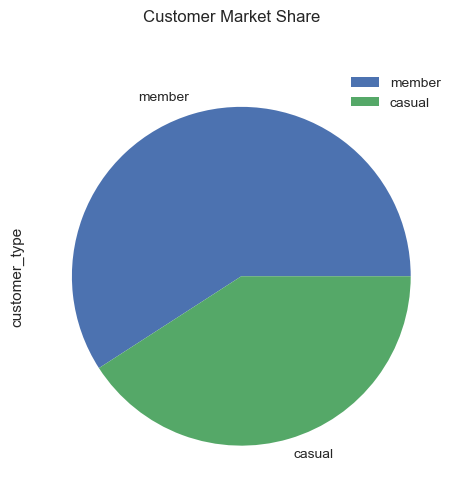

In [31]:
customer_market_share.plot(kind='pie', title="Customer Market Share", subplots=True, )
plt.show()

### Bike Type Market Share

In [32]:
# Bike usage totals
bike_usage = trip_data["bike_type"].value_counts().to_frame()
bike_usage

,bike_type
electric_bike,2935126
classic_bike,2637808
docked_bike,182194


In [33]:
# Bike usage in percent
trip_data["bike_type"].value_counts(normalize=True).to_frame()

,bike_type
electric_bike,0.510002
classic_bike,0.45834
docked_bike,0.031658


- Electric bikes are slightly more popular than classic bikes.
- Electric bikes are used more than 51% of the time.
- Docked bikes make up only 3% of all bike usage.

### Visualize Bike Type Market Share

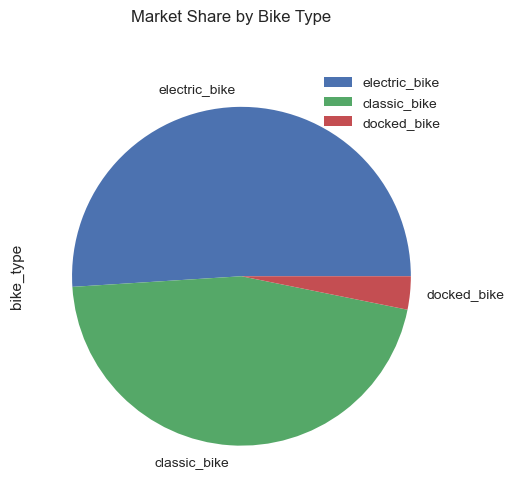

In [34]:
bike_usage.plot(kind='pie', title="Market Share by Bike Type", subplots=True, )
plt.show()

### Rides by 'customer_type' and 'bike_type

In [35]:
# Total number of rides by 'customer_type' and 'bike_type'
cust_bike_type = trip_data.groupby(["bike_type", "customer_type"])["customer_type"].count().unstack().fillna(value = 0)
cust_bike_type

customer_type,casual,member
bike_type,,
classic_bike,897376.0,1740432.0
docked_bike,182194.0,0.0
electric_bike,1273179.0,1661947.0


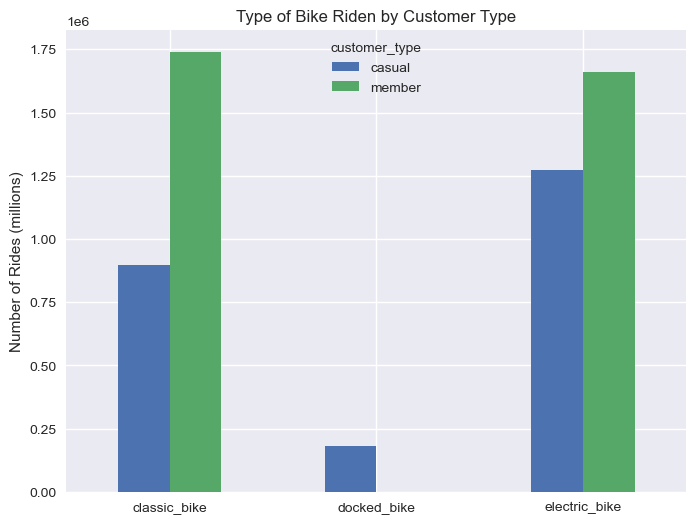

In [36]:
cust_bike_type.plot(kind="bar", figsize=(8, 6),
                    title="Type of Bike Riden by Customer Type",
                    ylabel="Number of Rides (millions)",
                    xlabel="", rot=0)
plt.show()

- Members do not use docked bikes.
- Member slightly prefer classic bikes over electric ones.
- Casual riders use all three of our bike options.
- Casual riders prefer electric bikes.

## Trend Identification and Analysis
- Calculate max, min, and mean 'ride_length'
- Compare the average 'ride_length' by 'customer_type'
- Calculate the average 'ride_length' for users by 'day_of_week'
- Calculate the number of rides for users by 'day_of_week'
- Calculate the average 'ride_length' for users by 'month_of_year'
- Calculate the number of rides for users by 'month_of_year'

In [37]:
# For all rides
trip_data["ride_length"].agg(["min", "max", "mean", "median"]).to_frame()

,ride_length
min,0.020000
max,41387.250000
mean,19.444131
median,10.350000


In [38]:
# By 'customer_type'
trip_data.groupby("customer_type")["ride_length"].agg(["min", "max", "mean", "median"])

,min,max,mean,median
customer_type,,,,
casual,0.02,41387.25,29.174521,13.17
member,0.02,1559.9,12.715554,8.83


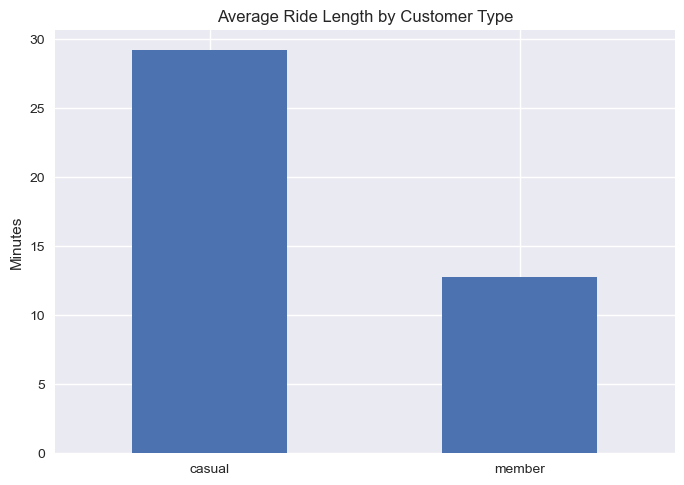

In [39]:
trip_data.groupby("customer_type")["ride_length"].agg("mean").plot(kind="bar",
                                                                   title="Average Ride Length by Customer Type",
                                                                   ylabel="Minutes",
                                                                   xlabel="",
                                                                   rot=0,
                                                                   fontsize=10)
plt.show()

- The max trip duration indicates there are outliers in 'ride_length'
- Obsservations for both casual riders and annual members are right skewed
- Members appear, on average, to have shorter trip legnths
- Casual riders, on average, have more than double the avg. 'ride_length' than annual members

### By 'day_of_week'

In [40]:
# Using the 'date_name' attribute from the calender library to get the x-axis sort order 
weekdays = calendar.day_name[:]
weekdays

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#### Average 'ride_length

In [41]:
# Calculate the average 'ride_length' per 'day_of_week' by 'customer_type'
avg_day_ride_length = trip_data.groupby(["customer_type", "day_of_week"])["ride_length"].agg("mean").unstack().T

In [42]:
# Sort the index
avg_day_ride_length = avg_day_ride_length.reindex(weekdays)

In [43]:
avg_day_ride_length

customer_type,casual,member
day_of_week,,
Monday,29.295771,12.295921
Tuesday,26.022079,12.135809
Wednesday,24.908162,12.080362
Thursday,25.473353,12.248745
Friday,27.909048,12.478347
Saturday,32.637972,14.183808
Sunday,33.854357,14.0801


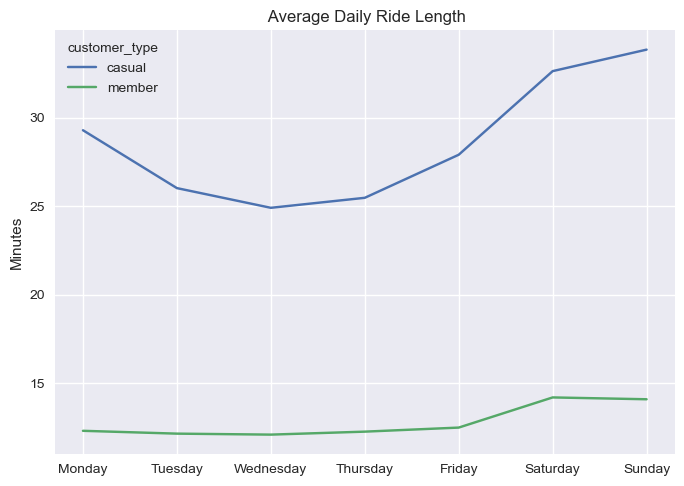

In [44]:
avg_day_ride_length.plot(title=" Average Daily Ride Length", ylabel="Minutes", xlabel="")
plt.show()

- Both annual members and casual riders ride longer on the weekend.
- The increase for members is not significant.

#### Number of rides

In [45]:
# Calculate the number of rides per day by customer type
customers_per_day = trip_data.groupby(["day_of_week", "customer_type"])["day_of_week"].count().unstack()

# Sort the index
customers_per_day = customers_per_day.reindex(weekdays)

In [46]:
customers_per_day

customer_type,casual,member
day_of_week,,
Monday,284944,489653
Tuesday,264360,523669
Wednesday,275374,529625
Thursday,306916,532623
Friday,338918,476662
Saturday,485217,454352
Sunday,397020,395795


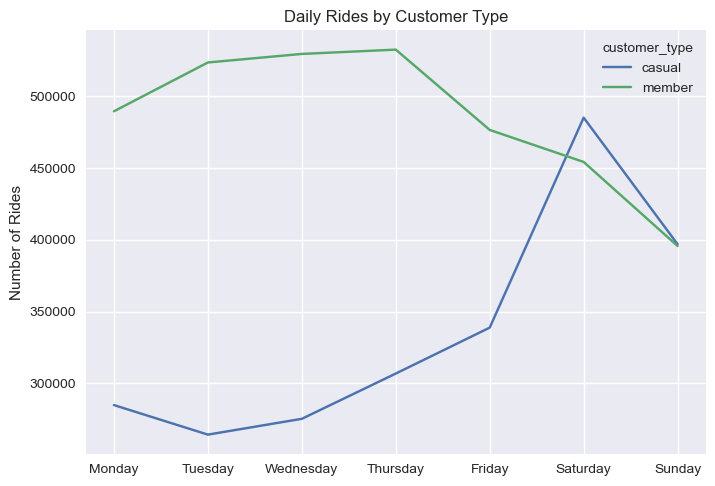

In [47]:
customers_per_day.plot(title="Daily Rides by Customer Type", ylabel="Number of Rides", xlabel="")
plt.show()

- Members mainly ride during the work week. (_Weekend drop off is not major_)
- Casual riders prefer riding on the weekend.
- Are there any local events taking place on the weekend?
- Do members use our bikes to commute to work? Casual riders?
- Can we survey our riders to discover how and why they utilize our service?

### By 'month_of_year'

In [48]:
# Using the 'month_name' attribute from the calender library
months = calendar.month_name[1:]
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [49]:
# Rearrange the list to represent the previous year  
for n in range(2):
    months.insert(0, months[-1])
    months.pop()
    
months

['November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October']

#### Avgerage 'ride_length'

In [50]:
# Calculate the average 'ride_length' per 'day_of_week' by 'customer_type'
avg_monthly_ride_length = trip_data.groupby(["customer_type", "month_of_year"])["ride_length"].agg("mean").unstack().T

# Sort the index
avg_monthly_ride_length = avg_monthly_ride_length.reindex(months)
avg_monthly_ride_length

customer_type,casual,member
month_of_year,,
November,23.135486,11.310125
December,23.497328,11.00568
January,30.382389,11.981801
February,26.710952,11.40588
March,32.625361,11.958948
April,29.536862,11.492964
May,30.872686,13.367429
June,32.10152,14.000385
July,29.281224,13.719402


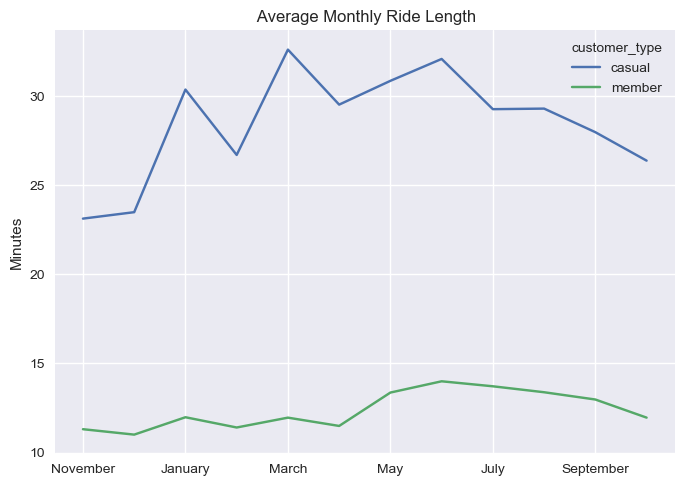

In [51]:
avg_monthly_ride_length.plot(title=" Average Monthly Ride Length", ylabel="Minutes", xlabel="")
plt.show()

- Members, on average, ride longer during the summer months.
- Casual riders, on average, ride longer in January and March thru June.

#### Number of rides

In [52]:
# Calculate the number of rides per day by customer type
customers_per_m = trip_data.groupby(["month_of_year", "customer_type"])["month_of_year"].count().unstack()

# Sort the index
customers_per_m = customers_per_m.reindex(months)
customers_per_m

customer_type,casual,member
month_of_year,,
November,106884,253008
December,69729,177790
January,18517,85248
February,21414,94190
March,89874,194150
April,126398,244820
May,280387,354423
June,369022,400116
July,406013,417403


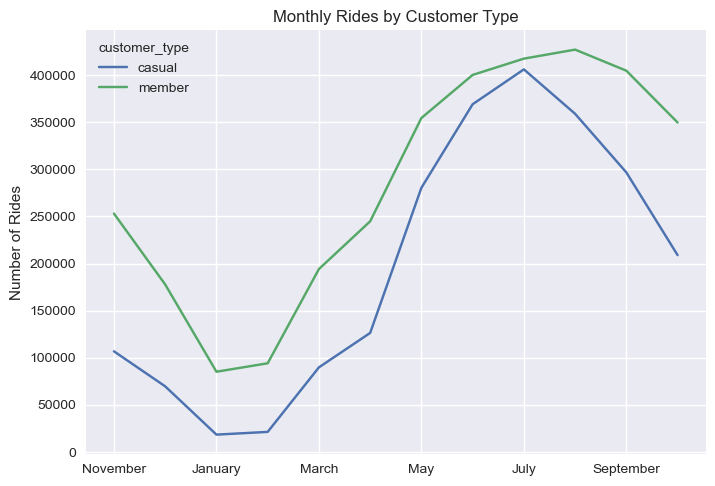

In [53]:
customers_per_m.plot(title="Monthly Rides by Customer Type", ylabel="Number of Rides", xlabel="")
plt.show()

- Winter is the slowest time of year.
- Summer is our best season.
- We saw a significant increase in rides from April to May, for both annual members and casual riders.
- June and July are the only months where annual members ride difference over casual riders is less than 50,000.

## Visualize Ride Length Outliers

### By 'day_of_week'

<Figure size 2400x1200 with 0 Axes>

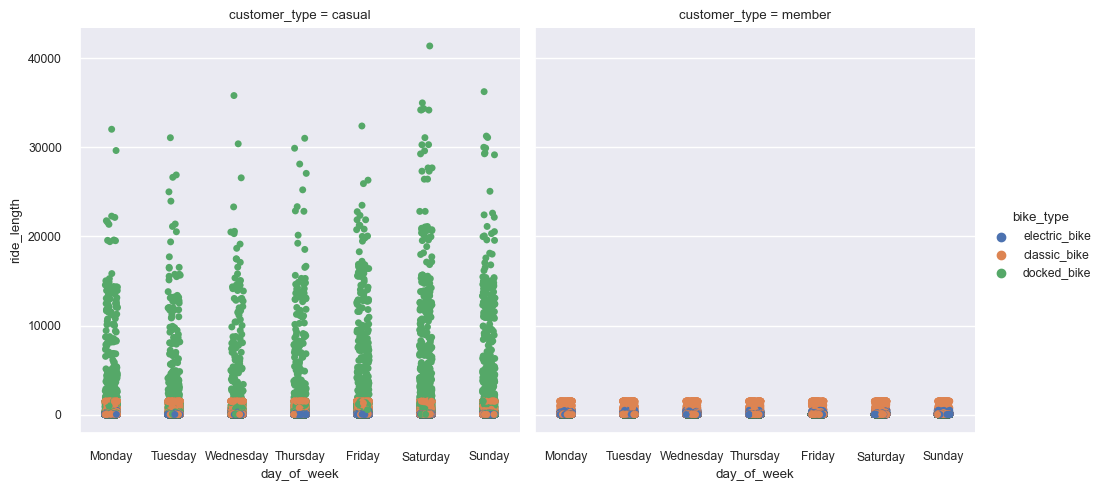

In [54]:
plt.figure(figsize=(24,12))
sns.set(font_scale=.8)
sns.catplot(data=trip_data, x="day_of_week", y ="ride_length",
            col="customer_type", hue="bike_type", order=weekdays)
plt.show()

### By 'month_of_year'

<Figure size 2400x1200 with 0 Axes>

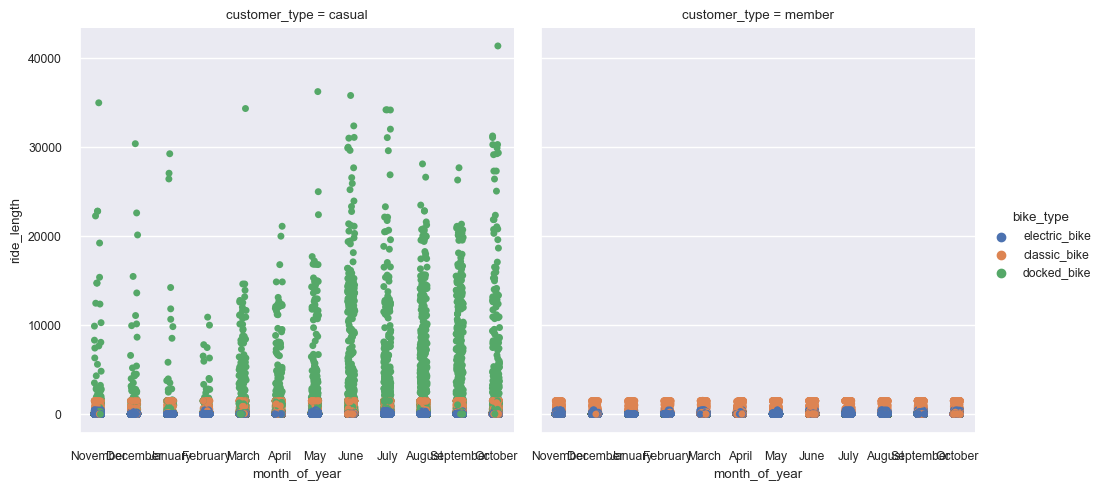

In [55]:
plt.figure(figsize=(24,12))
sns.set(font_scale=.8)
sns.catplot(data=trip_data, x="month_of_year", y ="ride_length",
            col="customer_type", hue="bike_type", order=months)
plt.show()

- Ride Length outliers seem to arise from the docked bike trips
- Data does not include removed negative 'ride_length' values

In [56]:
# Save cleaned dataframe
report_path = os.getcwd() + "\\Analyzed\\"
trip_data.to_csv(f"{report_path}trip_data_cleaned.csv", index=False)

## Summary

### How do we convert casual riders into annual members?

#### Limitations
- Data does not distinguish repeat customers
- Geographical data not factored in analysis
- 'bike_type' category doesn't specify assistive bikes

#### Notes
- 8% of riders use assistive bike options (riders with diabilities and/or can't use standard two-wheeled bikes)
- 30% of riders use Cyclistic to commute to work
- Casual riders ride more on the weekends
- Annual members ride more during the work week
- Docked bikes are only used by casual riders
- Summer is the busiest season
- Weekends ard busier than weekdays
- Dashboard designed and created using Power BI
- Presentation completed with Google Slides

## Recommendation #1

<b>Focus on a campaign targeting weekend, Fri. thru Sun., docked bike customers</b>
- There are currently no members who use the docked bike type
- These represent 3% of all current bike rides
- Entice these customers with perks to convert

## Recommendation #2

<b>Start a campaign focused on our electric bike casual riders</b>
- These make up more than 50% of the bikes used
- Highlight the benefits of an annual membership
- Offer perks for local cultural and athletic events

## Recommendation #3

<b>Start a campaign highlighting our accessibility to people with disabilities</b>
- Assistive bike trips account for 8% of rides
- Highlight the benefits of membership over being a casual rider
- Offer a discount to these riders for conversion
- Partner with local Charities or Organizations who support the disabled